
## 5 th analisis 
### PARA: 
  `Test de hipotesis Energia -> casi distribucion normal`
===================================================================

# ANALISIS DE DATOS DE NANOPARTICULAS DE ORO
### EDA
#### Autora: Josefina Cresta

### Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Importación de base de datos

In [2]:
data = pd.read_csv("/Users/jofi/DEV_THE_BRIDGE_FEB22/EDA/previa/1-Au-DataSet/Au_nanoparticle_dataset.csv")

In [5]:
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E', 'Formation_E']
data_6= data.loc[:,cols]
data_6

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_avg,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,12.2159,8.5533,62641,2.91042,-41427.9010,1597.7390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,11.8126,8.2719,7923,2.94491,-5346.9589,553.2311
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,11.7971,8.2790,12167,2.94709,-8218.1252,833.5248
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,11.7948,8.3132,14805,2.95349,-9876.2899,930.9501
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,11.8058,8.3024,16920,2.95409,-11261.0810,1047.5990


In [13]:
data_6.shape

(4000, 16)

In [11]:
data_6['N_total'].unique().size


1898

ENERGIA POR ATOMO

In [14]:
(data_6['Total_E']/data_6['N_total']).mean()

-3.6083176471057468

In [17]:
(data_6['Total_E']/data_6['N_total']).var()

0.008802643124541092

RADIO PROMEDIO

In [21]:
data_6.R_avg.min()

8.5286

In [22]:
data_6.R_avg.max()

39.2392

In [20]:
data_6.R_avg.mean()

20.654363375

LONGITUD DE ENLACE

Numero de enlaces no tiene sentido sacarle la media y vemos que su varianza es enorme. POrque depende de la cantidad de atomos

In [28]:
data_6.N_bonds.mean()

19330.7005

In [29]:
data_6.N_bonds.var()

440804666.0188044

Mejor se hace el numero de enlaces por atomo y de eso si se saca el estadistico 

In [27]:
(data_6.N_bonds/data_6.N_total).mean()

5.400602871569044

In [30]:
(data_6.N_bonds/data_6.N_total).var()

0.03974751612049866

Sacamos el estadistico tambien de la longitud de los enlaces

In [23]:
data_6.Avg_bonds.mean()

2.9147176100000003

In [24]:
data_6.Avg_bonds.var()

0.0005841064128411104

CORDINACIONES 

Avg_total	Avg_bulk	Avg_surf	

In [34]:
data_6.Avg_total.mean()

10.80120505

In [35]:
data_6.Avg_total.var()

0.15899017606851465

### Enlaces en BULK ---> FCC

In [25]:
data_6.Avg_bulk.mean()

12.13831165

In [26]:
data_6.Avg_bulk.var()

0.027173827586174044

In [32]:
data_6.Avg_surf.mean()

8.471661325000001

In [33]:
data_6.Avg_surf.var()

0.031084400651907353

# Análisis de normalidad 

In [89]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
#plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### EJjemplo alturas

In [37]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


In [38]:
datos = datos[(datos.age > 15) & (datos.male ==0)]
peso = datos['weight']

Metodo grafico

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles. 

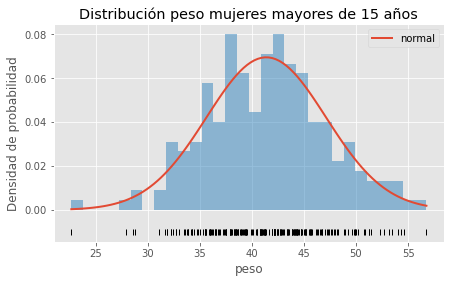

In [41]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=peso, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(peso, np.full_like(peso, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

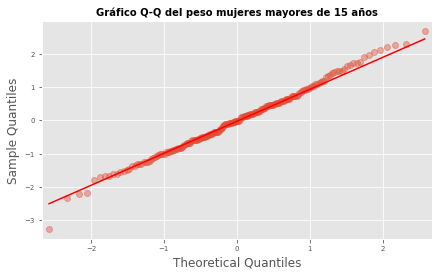

In [90]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# Analisis de normalidad para energia por atomo

Energia de formación

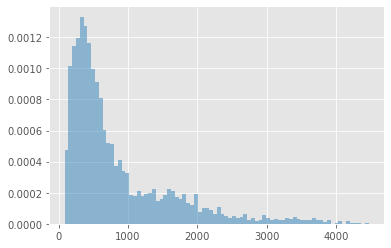

In [65]:
energias=data_6['Formation_E'].dropna(how='any')
plt.hist(x=energias, density=True, bins=80, color="#3182bd", alpha=0.5);

In [ ]:
sns.box

Energias totales

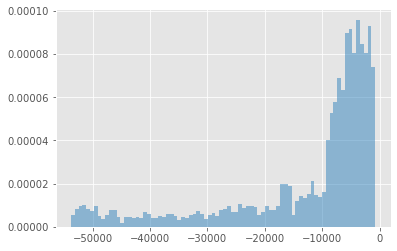

In [69]:
energias=data_6.Total_E.dropna(how='any')
plt.hist(x=energias, density=True, bins=80, color="#3182bd", alpha=0.5);

Energia por atomo

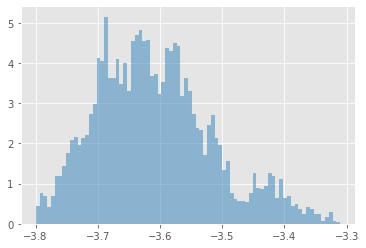

In [67]:
energias=(data_6.Total_E/data_6.N_total).dropna(how='any')
plt.hist(x=energias, density=True, bins=80, color="#3182bd", alpha=0.5);

Analisis de normalidad para la energia por atomo

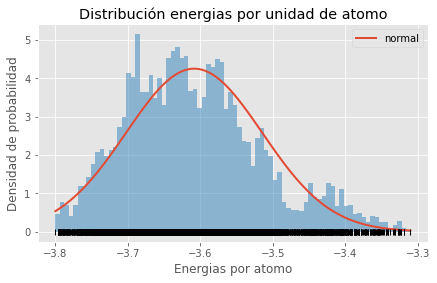

In [71]:
# Histograma + curva normal teórica
# ==============================================================================
energias=(data_6.Total_E/data_6.N_total).dropna(how='any')

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(energias)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(energias), max(energias), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=energias, density=True, bins=80, color="#3182bd", alpha=0.5)
ax.plot(energias, np.full_like(energias, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución energias por unidad de atomo')
ax.set_xlabel('Energias por atomo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [86]:
from statsmodels.graphics.gofplots import qqplot

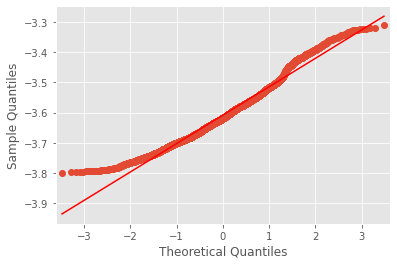

In [100]:
# Gráfico Q-Q
# ==============================================================================
energias=(data_6.Total_E/data_6.N_total).dropna(how='any')
#fig, ax = plt.subplots(figsize=(7,4))
#sm.qqplot(energias, fit = True, line="s", color="blue", alpha = 0.4, lw    = 2, ax= ax)
qqplot(energias, line="s", color='g');
#ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10, fontweight = "bold")
#ax.tick_params(labelsize = 7)

## Métodos analíticos asimetría y curtosis


Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema. 

In [101]:
print('Kursotis:', stats.kurtosis(energias))
print('Skewness:', stats.skew(energias))

Kursotis: 0.006069844284549042
Skewness: 0.5427347528795372


Las energias totales deberian dar fatal.. 

In [110]:
energias_totales=data_6.Total_E.dropna(how='any')

print('Kursotis:', stats.kurtosis(energias_totales))
print('Skewness:', stats.skew(energias_totales))

Kursotis: 1.3953922641231156
Skewness: -1.5734787716149707


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


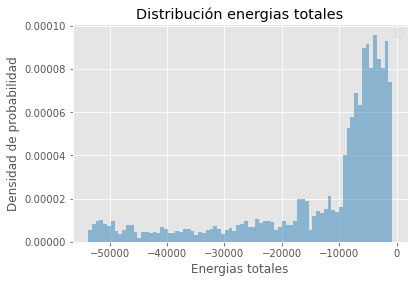

In [115]:
# Histograma + curva normal teórica
# ==============================================================================
energias_totales=(data_6.Total_E).dropna(how='any')


plt.hist(x=energias_totales, density=True, bins=80, color="#3182bd", alpha=0.5)

plt.title('Distribución energias totales')
plt.xlabel('Energias totales')
plt.ylabel('Densidad de probabilidad')
plt.legend();

bueno no tan fatal. 

Pero vemos cola a la izquierda. Diremos que hay **asimetría negativa**  (o a la izquierda) si la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda.

Esto se debe a que hay memos probabilidad de energias bajas en la muestra

## Contraste de hipótesis


Los test **Shapiro-Wilk** test y **D'Agostino's K-squared**  test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal. 

In [118]:

# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(energias)
shapiro_test

ShapiroResult(statistic=0.9768173694610596, pvalue=4.9649298070516095e-25)

In [119]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(energias)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 173.56178055964725, p-value = 2.0489823473127228e-38


# EL P_VALOR ME DA MUUUY CHICO. 

In [120]:
energias_totales=(data_6.Total_E).dropna(how='any')
k2, p_value = stats.normaltest(energias_totales)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1012.1636488938932, p-value = 1.627257384921689e-220


# Análisis de homocedasticidad y heterocedasticidad con python

In [131]:
pares = data_6[data_6['N_total']%2==0]

In [135]:
(pares.Total_E)/pares.N_total

1      -3.675642
4      -3.764804
8      -3.795445
9      -3.795376
10     -3.690615
          ...   
3989   -3.590056
3990   -3.452393
3997   -3.573187
3998   -3.577218
3999   -3.578624
Length: 1922, dtype: float64

In [132]:
impares= data_6[data_6['N_total']%2!=0]

In [136]:
# Levene test
# ==============================================================================
levene_test = stats.levene((pares.Total_E)/pares.N_total, (impares.Total_E)/impares.N_total, center='median')
levene_test

LeveneResult(statistic=2.352340983245974, pvalue=0.12517415005882918)

In [ ]:
datos['male'] = datos['male'].astype(str)
datos = datos[(datos.age > 15)]
pares = data_6[data_6['N_total']%2==0]
peso_mujeres = datos.loc[datos.male == '0', 'weight']

In [ ]:
data_6['N_total']

In [142]:
(data_6['N_total']%2==0)

0       False
1        True
2       False
3       False
4        True
        ...  
3995    False
3996    False
3997     True
3998     True
3999     True
Name: N_total, Length: 4000, dtype: bool

In [152]:

data_6

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_avg,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,Total_E,Formation_E,paridad
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555,False
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166,True
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040,False
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890,False
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,34.2831,11.3851,12.2159,8.5533,62641,2.91042,-41427.9010,1597.7390,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,17.4079,10.5010,11.8126,8.2719,7923,2.94491,-5346.9589,553.2311,False
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,21.2937,10.5114,11.7971,8.2790,12167,2.94709,-8218.1252,833.5248,False
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,21.4990,10.7127,11.7948,8.3132,14805,2.95349,-9876.2899,930.9501,True
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,22.5111,10.7497,11.8058,8.3024,16920,2.95409,-11261.0810,1047.5990,True
